Student id: 24206493

 ### Assignment 2

#### Task 1: Data Characterisation
   
a. Perform an initial characterisation of the activity log data to explore its
structure and overall trends.

b. Produce a visualisation showing the overall distribution of student grades.

Starting by importing all the libraries and loading the csv into two different dataframes, grades and log and conducting all the fit checks/type checks before moving to explore trends and distribution.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
grades = pd.read_csv("vle_grades.csv")

In [3]:
grades.shape    #checking the shape

(300, 2)

In [4]:
grades.columns   #checking the column names

Index(['student_id', 'final_grade'], dtype='object')

The dataframe grades has two columns: student_id and final_grade for 300 students.

In [5]:
grades.head()

,student_id,final_grade
0,22002,distinction
1,22003,fail
2,22005,pass
3,22009,merit
4,22012,pass


In [6]:
grades.set_index("student_id") #setting student_id as index

,final_grade
student_id,
22002,distinction
22003,fail
22005,pass
22009,merit
22012,pass
...,...
22987,fail
22988,pass
22992,merit


Moving on to follow the same steps as above with vle_log.csv file.

In [7]:
log = pd.read_csv("vle_log.csv")

In [8]:
log.shape     #checking the shape, this indicates that there is multiple log data for one student 

(33633, 3)

In [9]:
log.columns    #checking the column names

Index(['date', 'student_id', 'activity'], dtype='object')

In [10]:
log.set_index("student_id")  #There is so much data to work around with in this file

,date,activity
student_id,,
22149,2024-09-09,module_visit
22149,2024-09-09,topic_visit
22149,2024-09-09,topic_visit
22149,2024-09-09,lab_material_download
22149,2024-09-11,module_visit
...,...,...
22469,2024-10-10,forum_post_reply
22469,2024-10-16,module_visit
22469,2024-11-13,module_visit


The log file has multiple entries for one student. The information is about the day the student logged in and the activity they took part in on the virtual learning environment. The data seems to be captured for approximately three months from 9th of September to 13th of November at the outset but this needs to be checked properly. Moreover, how many distinct activities can a student take part in needs to be checked along with missing values in both the files. Following are steps to achieve this.

In [11]:
log["date"].min()

'2024-09-09'

In [12]:
log["date"].max()

'2024-11-29'

This clears out that the data available is for 82 days starting from 9 September 2024 to 29 November 2024.

In [13]:
grades.isnull().sum() #missing value check, no missing value found


student_id     0
final_grade    0
dtype: int64

In [14]:
log.isnull().sum() #missing value check, no missing value found

date          0
student_id    0
activity      0
dtype: int64

Its better to check the type of the columns values as well specially with date, as we would want it to be in datetime for analysis 

In [15]:
grades["final_grade"][0] #this works as str which is ok

'distinction'

In [16]:
log['date'].head()  #this should be a datetime object, changing it

0    2024-09-09
1    2024-09-09
2    2024-09-09
3    2024-09-09
4    2024-09-11
Name: date, dtype: object

In [17]:
log['date']= pd.to_datetime(log['date'])

In [18]:
log['date'].head()

0   2024-09-09
1   2024-09-09
2   2024-09-09
3   2024-09-09
4   2024-09-11
Name: date, dtype: datetime64[ns]

In [19]:
type(log['activity'][0]) #its a str which works ok, checking distinct categories

str

In [20]:
log['activity'].value_counts()

module_visit             11889
topic_visit              11150
lab_material_download     5472
video_lecture_view        3856
quiz_attempt               598
forum_post_reply           448
external_link_click        220
Name: activity, dtype: int64

There are seven types of distinct activities that a student can be part of: module_visit, topic_visit, lab_material_download, video_lecture_view, quiz_attempt, forum_post_reply and external_link_click. The highest count is for module_visit followed by topic_visit and lab_material_download. Its also possible that everyone has to visit the module in order to visit the topic and the rest of the activities similar to what we have on Brightspace. If this is true then if in any of the days, module visit is zero, everything else will be zero as well. This would mean that if I want to see each students weekly activity progression, there will be many missing values. Before deepdiving into that, I want to get some aggregate features in place.

In [21]:
stu_act_count= log.groupby(['student_id', 'activity']).size().unstack(fill_value=0)

stu_act_count is to get a picture of count of each students activity by type

In [22]:
stu_act_count.head(15) 

activity,external_link_click,forum_post_reply,lab_material_download,module_visit,quiz_attempt,topic_visit,video_lecture_view
student_id,,,,,,,
22002,0,3,29,47,2,65,23
22003,0,0,13,22,0,22,8
22005,1,2,7,27,1,22,5
22009,1,4,25,47,2,46,14
22012,0,1,9,33,1,19,9
22013,0,3,24,48,4,49,17
22023,1,0,30,51,3,54,19
22026,0,1,6,34,3,23,13
22034,0,3,22,44,7,59,21


external_link_click, forum_post_reply and quiz_attempt have very low value viz-a-viz the other four. Topic and module are visited more than downloading lab material and viewing video lecture. Thinking from a student's perspective, if I am interested in enhancing my grades, I would ideally want to do everything, however given that I have other modules and their deadlines as well, I would atleast ensure that I visit all the topics, watch all videos, practice the labs and attempt the quiz. If I am extremely interested in the module/topic or I see it helping me in my career, I would also respond to forums and check whats on the external link. However, this might not happen all the time given the assignment/workload. May be that explains lesser clicks on external_link_click and forum_post_reply.
Not all students will be engaged in all seven activities depending on their motivation levels and interest in the module. So a hypothesis can be that the distinct logins by activity type, the better the performance.

In [23]:
distinct_activity = log.groupby('student_id')['activity'].nunique().reset_index()
distinct_activity.columns = ['student_id', 'num_distinct_activity']

In [24]:
distinct_activity.head(20)

,student_id,num_distinct_activity
0,22002,6
1,22003,4
2,22005,7
3,22009,7
4,22012,6
5,22013,6
6,22023,6
7,22026,6
8,22034,6
9,22037,7


It would be interesting to add another detail to it such as how many unique login dates does each student have. This would give us two features: total distinct logins and count of distinct activity by each student. 

In [25]:
distinct_logins =log.groupby('student_id')['date'].nunique().reset_index()

In [26]:
distinct_logins

,student_id,date
0,22002,47
1,22003,22
2,22005,27
3,22009,47
4,22012,33
...,...,...
295,22987,16
296,22988,36
297,22992,46
298,22994,42


In [27]:
studentABT = pd.merge(distinct_logins, distinct_activity, on='student_id', how='inner')

In [28]:
studentABT

,student_id,date,num_distinct_activity
0,22002,47,6
1,22003,22,4
2,22005,27,7
3,22009,47,7
4,22012,33,6
...,...,...,...
295,22987,16,4
296,22988,36,6
297,22992,46,7
298,22994,42,7


In the below steps, I want to explore the date column in the log dataframe. My idea is to see if there are any features I can extract from this data that would link to performance of a student. Ideally, if I would want to score well on my grades, my activity would be consistent throughout the module term and incase due to some circumstances, I couldn't be consistent, by the end of the semester my activity would be extremely high. Keeping that logic in mind, I would try to get weekly activity for each student and plot their trajectory. I am not sure if the classifier would be able to pick what I am doing but its worth a try.

To check the general trends with date, I am creating a group using crosstab between date and activity.

In [29]:
group1 = pd.crosstab(log['date'], log['activity'])

In [30]:
group1

activity,external_link_click,forum_post_reply,lab_material_download,module_visit,quiz_attempt,topic_visit,video_lecture_view
date,,,,,,,
2024-09-09,2,6,73,222,16,195,98
2024-09-10,2,5,89,226,14,203,106
2024-09-11,0,8,121,223,5,196,48
2024-09-12,4,11,145,234,9,214,42
2024-09-13,8,5,61,170,7,164,44
...,...,...,...,...,...,...,...
2024-11-25,4,5,88,198,6,202,96
2024-11-26,2,6,65,196,13,171,91
2024-11-27,3,11,123,219,16,220,54


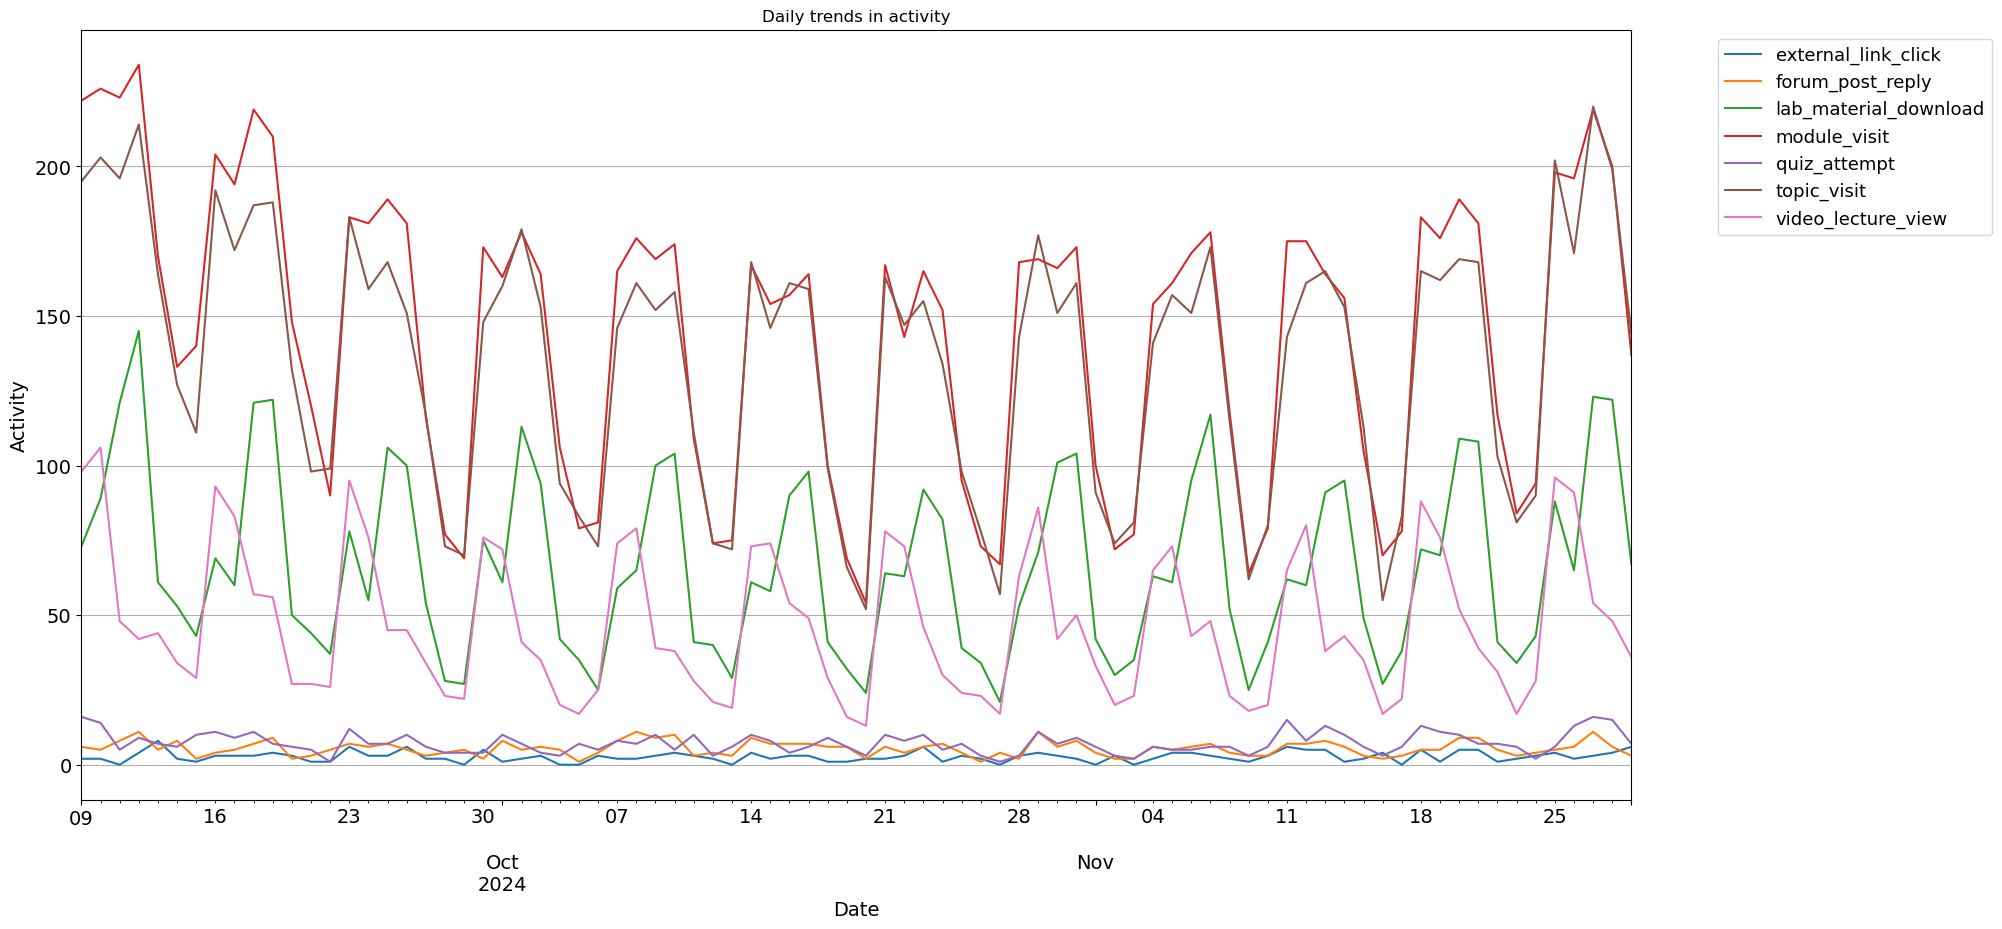

In [31]:
#using plot function to visualise the general daily trend with all the students
group1.plot(kind = "line", figsize=(20, 10), fontsize=14, title="Daily trends in activity")
plt.grid(axis="y")
plt.legend( fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Activity', fontsize=14);
plt.show()

The plot above shows a few of things:

1. There is a weekly high and low and I think that the low would be the weekend.
2. A distinct U shape is clear in the top 4 activities, which means that theres a bit of a slump in the middle of the semester.
3. Module visit in red on an average seems to be higher values, consistent with our tables above. So the hypothesis of module visit being the first touch point akin to Brightspace makes sense.
4. Module visit and Topic visit have distinct two peaks and topic visit seems to be mimicing module visits trends.
5. Lab material download only happens once the student has seen the video lecture.

Plotting the weekend line so check if thats really the case.

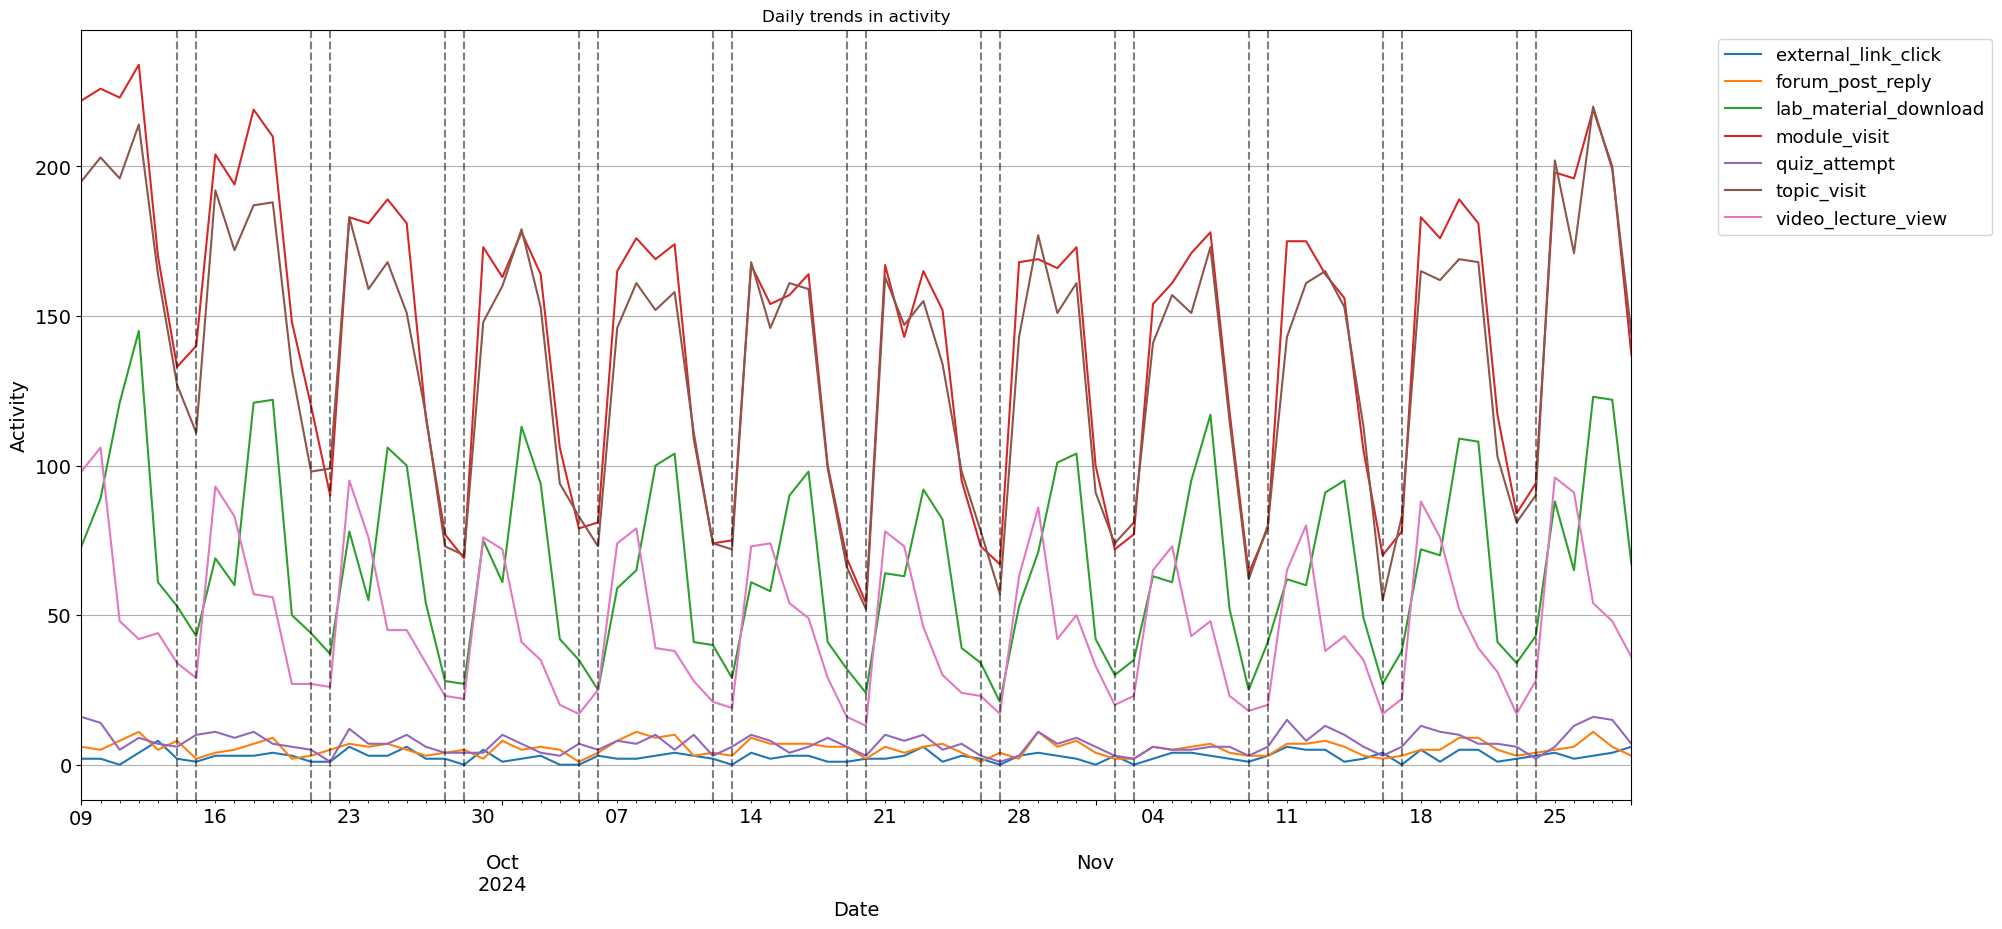

In [32]:
group1.plot(kind = "line", figsize=(20, 10), fontsize=14, title="Daily trends in activity")
plt.grid(axis="y")
plt.legend( fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Activity', fontsize=14);
for date in group1.index:
    if date.weekday() >= 5:  # Saturday (5) or Sunday (6)
        plt.axvline(x=date, color='black', linestyle='--', alpha=0.5)
plt.show()

Before moving forward to construct detailed features from the date, checking the overall distribution of the final grade in grades dataframe.

In [33]:
grades["final_grade"].describe()

count       300
unique        4
top       merit
freq        121
Name: final_grade, dtype: object

In [34]:
grades["final_grade"].value_counts()

merit          121
pass            88
distinction     60
fail            31
Name: final_grade, dtype: int64

In [35]:
x = grades["final_grade"].value_counts()

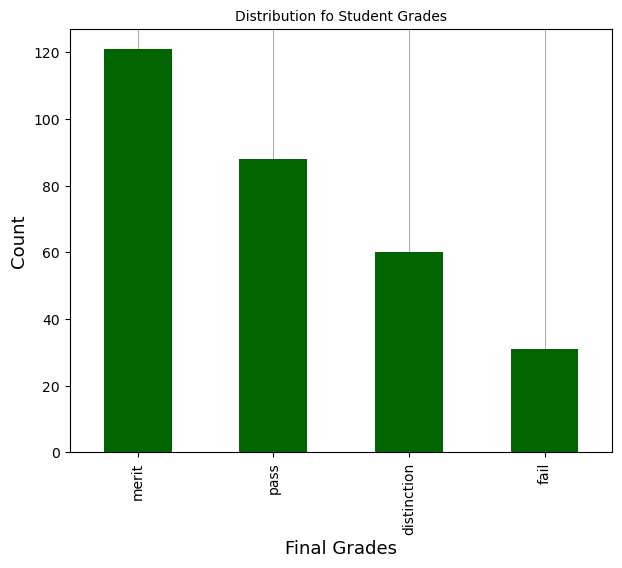

In [36]:
ax = x.plot(kind = "bar" ,figsize=(7, 5.5), color="darkgreen", zorder=3)
plt.grid(axis="x")
plt.title("Distribution fo Student Grades", fontsize=10)
plt.xlabel('Final Grades', fontsize=13)
plt.ylabel('Count', fontsize=13);
plt.show()

The plot above shows total count of students failed, just passed, passed with a distinction and passed with merit. Given the highest count is of grade merit (close to 40%) followed by distinction (20%) and pass (30%), deriving complex features such as time series becomes even more important. 

#### ABT Creation

a. From the VLE activity log data, create an appropriate Analytics Base Table (ABT) such that each row in the resulting table corresponds to a unique student. Columns in this table should represent aggregated features
derived from the activity log. Features could include (but are not limited to) aspects such as the number
of activities of a given type for each student or when a student typically engaged in VLE activities. Finally, the table should include a column representing the final grade achieved by each student.

b. Produce visualisations showing how the values of the final grade relate to each of the other features in the ABT.

Starting with renaming the colums of our studentABT to see where I am at.

In [37]:
studentABT

,student_id,date,num_distinct_activity
0,22002,47,6
1,22003,22,4
2,22005,27,7
3,22009,47,7
4,22012,33,6
...,...,...,...
295,22987,16,4
296,22988,36,6
297,22992,46,7
298,22994,42,7


In [38]:
studentABT = studentABT.rename(columns={'date': 'days_active', 'num_distinct_activity': 'activity_active'})

In [39]:
studentABT

,student_id,days_active,activity_active
0,22002,47,6
1,22003,22,4
2,22005,27,7
3,22009,47,7
4,22012,33,6
...,...,...,...
295,22987,16,4
296,22988,36,6
297,22992,46,7
298,22994,42,7


So I have two features in place from the activity log. days_active provides with the number of days the student is active out of the total days that is 82 days and activity_active corresponds to the breadth of activities that the student is using to learning from. Moving on to derive more features from the activity log.

In [40]:
log.set_index("student_id")

,date,activity
student_id,,
22149,2024-09-09,module_visit
22149,2024-09-09,topic_visit
22149,2024-09-09,topic_visit
22149,2024-09-09,lab_material_download
22149,2024-09-11,module_visit
...,...,...
22469,2024-10-10,forum_post_reply
22469,2024-10-16,module_visit
22469,2024-11-13,module_visit


Capturing total logins by each student and merging it with studentABT.

In [41]:
total_logins = log.groupby(['student_id'])['date'].count()

In [42]:
studentABT = pd.merge(studentABT, total_logins, on= "student_id", how='inner')

In [43]:
studentABT.rename(columns={"date": "total_logins"}, inplace=True)

In [44]:
studentABT

,student_id,days_active,activity_active,total_logins
0,22002,47,6,169
1,22003,22,4,65
2,22005,27,7,65
3,22009,47,7,139
4,22012,33,6,72
...,...,...,...,...
295,22987,16,4,28
296,22988,36,6,80
297,22992,46,7,133
298,22994,42,7,129


So far, I got three features in place, total days active out of 82, distinct activity count and total logins for each student. Since, we saw that there is a significant pattern of slump during weekends in our aggregate activity line chart in the first task, its worth a try to check if learning on weekends has any effect on the performance of the student. Hence, I will getting a count of weekday logins and weekends logins for our log file to quantitatively make sense of it.

In [45]:
log

,date,student_id,activity
0,2024-09-09,22149,module_visit
1,2024-09-09,22149,topic_visit
2,2024-09-09,22149,topic_visit
3,2024-09-09,22149,lab_material_download
4,2024-09-11,22149,module_visit
...,...,...,...
33628,2024-10-10,22469,forum_post_reply
33629,2024-10-16,22469,module_visit
33630,2024-11-13,22469,module_visit
33631,2024-11-13,22469,topic_visit


In [46]:
#I am using weekday() function from datetime library to mark weekends for each log entry
from datetime import datetime 
log["date"][0].weekday()  # This means that 0-4 is Monday to Friday and 5,6 is Saturday and Sunday

0

In [47]:
log["is_weekend"] = log["date"].dt.weekday >= 5  

In [48]:
log

,date,student_id,activity,is_weekend
0,2024-09-09,22149,module_visit,False
1,2024-09-09,22149,topic_visit,False
2,2024-09-09,22149,topic_visit,False
3,2024-09-09,22149,lab_material_download,False
4,2024-09-11,22149,module_visit,False
...,...,...,...,...
33628,2024-10-10,22469,forum_post_reply,False
33629,2024-10-16,22469,module_visit,False
33630,2024-11-13,22469,module_visit,False
33631,2024-11-13,22469,topic_visit,False


In [49]:
log.groupby("is_weekend").size()  #There are 17% of the total logins on weekends

is_weekend
False    28651
True      4982
dtype: int64

In [50]:
#grouping the weekend data by student id and merging it into ABT
weekend = log.groupby(["student_id", "is_weekend"]).size().unstack(fill_value=0)

In [51]:
weekend

is_weekend,False,True
student_id,,
22002,133,36
22003,62,3
22005,59,6
22009,112,27
22012,61,11
...,...,...
22987,28,0
22988,75,5
22992,99,34


In [52]:
studentABT = pd.merge(studentABT, weekend, on= "student_id", how ="inner")

In [53]:
studentABT

,student_id,days_active,activity_active,total_logins,False,True
0,22002,47,6,169,133,36
1,22003,22,4,65,62,3
2,22005,27,7,65,59,6
3,22009,47,7,139,112,27
4,22012,33,6,72,61,11
...,...,...,...,...,...,...
295,22987,16,4,28,28,0
296,22988,36,6,80,75,5
297,22992,46,7,133,99,34
298,22994,42,7,129,106,23


In [54]:
studentABT.columns

Index(['student_id', 'days_active', 'activity_active', 'total_logins', False,
       True],
      dtype='object')

In [55]:
studentABT = studentABT.rename(columns = {False : "total_logins_weekday", True : "total_logins_weekend" })

In [56]:
studentABT

,student_id,days_active,activity_active,total_logins,total_logins_weekday,total_logins_weekend
0,22002,47,6,169,133,36
1,22003,22,4,65,62,3
2,22005,27,7,65,59,6
3,22009,47,7,139,112,27
4,22012,33,6,72,61,11
...,...,...,...,...,...,...
295,22987,16,4,28,28,0
296,22988,36,6,80,75,5
297,22992,46,7,133,99,34
298,22994,42,7,129,106,23


I might remove total logins later on as total_logins_weekday and total_logins_weekend add up to become that number. Moving on to get weekly statistics in place. I am going to find a min and max activity in 12 weeks for a student.

In [57]:
log["Weekly"] = pd.to_datetime(log["date"]).dt.to_period("W")  # getting the week out of the date using datetime feature and adding another column to process further

In [58]:
log

,date,student_id,activity,is_weekend,Weekly
0,2024-09-09,22149,module_visit,False,2024-09-09/2024-09-15
1,2024-09-09,22149,topic_visit,False,2024-09-09/2024-09-15
2,2024-09-09,22149,topic_visit,False,2024-09-09/2024-09-15
3,2024-09-09,22149,lab_material_download,False,2024-09-09/2024-09-15
4,2024-09-11,22149,module_visit,False,2024-09-09/2024-09-15
...,...,...,...,...,...
33628,2024-10-10,22469,forum_post_reply,False,2024-10-07/2024-10-13
33629,2024-10-16,22469,module_visit,False,2024-10-14/2024-10-20
33630,2024-11-13,22469,module_visit,False,2024-11-11/2024-11-17
33631,2024-11-13,22469,topic_visit,False,2024-11-11/2024-11-17


In [59]:
weekly_data = log.groupby(["student_id", 'Weekly']).size().reset_index(name="count") # counting the number of logins per week for each student number

In [60]:
weekly_data

,student_id,Weekly,count
0,22002,2024-09-09/2024-09-15,13
1,22002,2024-09-16/2024-09-22,19
2,22002,2024-09-23/2024-09-29,16
3,22002,2024-09-30/2024-10-06,4
4,22002,2024-10-07/2024-10-13,16
...,...,...,...
3444,22997,2024-10-28/2024-11-03,8
3445,22997,2024-11-04/2024-11-10,12
3446,22997,2024-11-11/2024-11-17,6
3447,22997,2024-11-18/2024-11-24,13


To create a table with student_id on axis = 0 and week on axis = 1, I am using the pivot function

In [61]:
weekly_data_pivot = weekly_data.pivot(index="student_id", columns="Weekly", values="count")

In [62]:
weekly_data_pivot #it has many NaN values which need to be replaced as 0 

Weekly,2024-09-09/2024-09-15,2024-09-16/2024-09-22,2024-09-23/2024-09-29,2024-09-30/2024-10-06,2024-10-07/2024-10-13,2024-10-14/2024-10-20,2024-10-21/2024-10-27,2024-10-28/2024-11-03,2024-11-04/2024-11-10,2024-11-11/2024-11-17,2024-11-18/2024-11-24,2024-11-25/2024-12-01
student_id,,,,,,,,,,,,
22002,13.0,19.0,16.0,4.0,16.0,16.0,16.0,18.0,6.0,15.0,16.0,14.0
22003,3.0,3.0,3.0,4.0,4.0,3.0,7.0,7.0,8.0,7.0,5.0,11.0
22005,15.0,10.0,3.0,13.0,NaN,2.0,1.0,1.0,NaN,10.0,2.0,8.0
22009,16.0,14.0,24.0,8.0,14.0,13.0,4.0,4.0,9.0,6.0,16.0,11.0
22012,13.0,1.0,5.0,12.0,2.0,4.0,5.0,1.0,8.0,7.0,9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22987,3.0,5.0,1.0,1.0,4.0,6.0,1.0,NaN,NaN,NaN,6.0,1.0
22988,14.0,8.0,10.0,2.0,NaN,5.0,10.0,7.0,5.0,3.0,6.0,10.0
22992,26.0,12.0,19.0,3.0,14.0,6.0,11.0,16.0,7.0,6.0,4.0,9.0


In [63]:
weekly_data_pivot = weekly_data_pivot.fillna(0)

In [64]:
weekly_data_pivot

Weekly,2024-09-09/2024-09-15,2024-09-16/2024-09-22,2024-09-23/2024-09-29,2024-09-30/2024-10-06,2024-10-07/2024-10-13,2024-10-14/2024-10-20,2024-10-21/2024-10-27,2024-10-28/2024-11-03,2024-11-04/2024-11-10,2024-11-11/2024-11-17,2024-11-18/2024-11-24,2024-11-25/2024-12-01
student_id,,,,,,,,,,,,
22002,13.0,19.0,16.0,4.0,16.0,16.0,16.0,18.0,6.0,15.0,16.0,14.0
22003,3.0,3.0,3.0,4.0,4.0,3.0,7.0,7.0,8.0,7.0,5.0,11.0
22005,15.0,10.0,3.0,13.0,0.0,2.0,1.0,1.0,0.0,10.0,2.0,8.0
22009,16.0,14.0,24.0,8.0,14.0,13.0,4.0,4.0,9.0,6.0,16.0,11.0
22012,13.0,1.0,5.0,12.0,2.0,4.0,5.0,1.0,8.0,7.0,9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22987,3.0,5.0,1.0,1.0,4.0,6.0,1.0,0.0,0.0,0.0,6.0,1.0
22988,14.0,8.0,10.0,2.0,0.0,5.0,10.0,7.0,5.0,3.0,6.0,10.0
22992,26.0,12.0,19.0,3.0,14.0,6.0,11.0,16.0,7.0,6.0,4.0,9.0


Changing the names of the columns for better understanding of the week numbers

In [65]:
col_names = weekly_data_pivot.columns
new_columns = []
for i in range(len(col_names)):
    new_columns.append(f"week_{i}_logins")
weekly_data_pivot.columns = new_columns

In [66]:
weekly_data_pivot

,week_0_logins,week_1_logins,week_2_logins,week_3_logins,week_4_logins,week_5_logins,week_6_logins,week_7_logins,week_8_logins,week_9_logins,week_10_logins,week_11_logins
student_id,,,,,,,,,,,,
22002,13.0,19.0,16.0,4.0,16.0,16.0,16.0,18.0,6.0,15.0,16.0,14.0
22003,3.0,3.0,3.0,4.0,4.0,3.0,7.0,7.0,8.0,7.0,5.0,11.0
22005,15.0,10.0,3.0,13.0,0.0,2.0,1.0,1.0,0.0,10.0,2.0,8.0
22009,16.0,14.0,24.0,8.0,14.0,13.0,4.0,4.0,9.0,6.0,16.0,11.0
22012,13.0,1.0,5.0,12.0,2.0,4.0,5.0,1.0,8.0,7.0,9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22987,3.0,5.0,1.0,1.0,4.0,6.0,1.0,0.0,0.0,0.0,6.0,1.0
22988,14.0,8.0,10.0,2.0,0.0,5.0,10.0,7.0,5.0,3.0,6.0,10.0
22992,26.0,12.0,19.0,3.0,14.0,6.0,11.0,16.0,7.0,6.0,4.0,9.0


In [67]:
max_week_login = weekly_data_pivot.idxmax(axis=1)

In [68]:
max_week_login

student_id
22002     week_1_logins
22003    week_11_logins
22005     week_0_logins
22009     week_2_logins
22012     week_0_logins
              ...      
22987     week_5_logins
22988     week_0_logins
22992     week_0_logins
22994     week_7_logins
22997     week_1_logins
Length: 300, dtype: object

In [69]:
min_week_login = weekly_data_pivot.idxmin(axis=1)

In [70]:
min_week_login

student_id
22002     week_3_logins
22003     week_0_logins
22005     week_4_logins
22009     week_6_logins
22012     week_1_logins
              ...      
22987     week_7_logins
22988     week_4_logins
22992     week_3_logins
22994     week_8_logins
22997    week_11_logins
Length: 300, dtype: object

In [71]:
weekly_data_pivot['max_week_login'] = max_week_login
weekly_data_pivot['max_logins'] = weekly_data_pivot.max(axis=1)
weekly_data_pivot['min_week_login'] = min_week_login
weekly_data_pivot['min_logins'] = weekly_data_pivot.min(axis=1)

/var/folders/ly/kgrwm8596cs_hs_dcb81wb440000gn/T/ipykernel_65621/1913011266.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weekly_data_pivot['max_logins'] = weekly_data_pivot.max(axis=1)
/var/folders/ly/kgrwm8596cs_hs_dcb81wb440000gn/T/ipykernel_65621/1913011266.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weekly_data_pivot['min_logins'] = weekly_data_pivot.min(axis=1)


In [72]:
weekly_data_pivot.columns

Index(['week_0_logins', 'week_1_logins', 'week_2_logins', 'week_3_logins',
       'week_4_logins', 'week_5_logins', 'week_6_logins', 'week_7_logins',
       'week_8_logins', 'week_9_logins', 'week_10_logins', 'week_11_logins',
       'max_week_login', 'max_logins', 'min_week_login', 'min_logins'],
      dtype='object')

Adding the max_login_week and min_logins_week to studentABT

In [73]:
studentABT["max_logins_week"] = list(weekly_data_pivot["max_logins"])

In [74]:
studentABT["min_logins_week"] = list(weekly_data_pivot["min_logins"])

In [75]:
studentABT

,student_id,days_active,activity_active,total_logins,total_logins_weekday,total_logins_weekend,max_logins_week,min_logins_week
0,22002,47,6,169,133,36,19.0,4.0
1,22003,22,4,65,62,3,11.0,3.0
2,22005,27,7,65,59,6,15.0,0.0
3,22009,47,7,139,112,27,24.0,4.0
4,22012,33,6,72,61,11,13.0,1.0
...,...,...,...,...,...,...,...,...
295,22987,16,4,28,28,0,6.0,0.0
296,22988,36,6,80,75,5,14.0,0.0
297,22992,46,7,133,99,34,26.0,3.0
298,22994,42,7,129,106,23,18.0,5.0


Adding a few mode features:
1. Ratio of lab_material_download to module visit
2. Ratio of video_lecture_view to module visit

I already have stu_act_count group that provides for total count by activity for each student. I am going to be using that group to get my metrics in place and adding the calculated matrix to studentABT

In [76]:
stu_act_count

activity,external_link_click,forum_post_reply,lab_material_download,module_visit,quiz_attempt,topic_visit,video_lecture_view
student_id,,,,,,,
22002,0,3,29,47,2,65,23
22003,0,0,13,22,0,22,8
22005,1,2,7,27,1,22,5
22009,1,4,25,47,2,46,14
22012,0,1,9,33,1,19,9
...,...,...,...,...,...,...,...
22987,0,0,3,16,0,7,2
22988,1,0,13,36,3,20,7
22992,1,5,27,46,2,41,11


In [77]:
stu_act_count["LabtoModule"] = stu_act_count["lab_material_download"]/stu_act_count["module_visit"]

In [78]:
stu_act_count["VideoLectoModule"] = stu_act_count["video_lecture_view"]/stu_act_count["module_visit"]

In [79]:
studentABT["Lab2Module"] = list(stu_act_count["LabtoModule"])
studentABT["Vid2Module"] = list(stu_act_count["VideoLectoModule"])

The external_link_click and quiz_attempt done seem to have a higher values so I am adding them to studentABT as is. 

In [80]:
studentABT["Ex_Link_Visit"] = list(stu_act_count["external_link_click"])
studentABT["Quiz_attempt"] = list(stu_act_count["quiz_attempt"])

In [81]:
studentABT.head()

,student_id,days_active,activity_active,total_logins,total_logins_weekday,total_logins_weekend,max_logins_week,min_logins_week,Lab2Module,Vid2Module,Ex_Link_Visit,Quiz_attempt
0,22002,47,6,169,133,36,19.0,4.0,0.617021,0.489362,0,2
1,22003,22,4,65,62,3,11.0,3.0,0.590909,0.363636,0,0
2,22005,27,7,65,59,6,15.0,0.0,0.259259,0.185185,1,1
3,22009,47,7,139,112,27,24.0,4.0,0.531915,0.297872,1,2
4,22012,33,6,72,61,11,13.0,1.0,0.272727,0.272727,0,1


Merging the studentABT with grades df to create final studentABT to check correlations and move to Task 3

In [82]:
studentABT = pd.merge(studentABT, grades, on = "student_id", how = "inner")

In [83]:
studentABT.head()

,student_id,days_active,activity_active,total_logins,total_logins_weekday,total_logins_weekend,max_logins_week,min_logins_week,Lab2Module,Vid2Module,Ex_Link_Visit,Quiz_attempt,final_grade
0,22002,47,6,169,133,36,19.0,4.0,0.617021,0.489362,0,2,distinction
1,22003,22,4,65,62,3,11.0,3.0,0.590909,0.363636,0,0,fail
2,22005,27,7,65,59,6,15.0,0.0,0.259259,0.185185,1,1,pass
3,22009,47,7,139,112,27,24.0,4.0,0.531915,0.297872,1,2,merit
4,22012,33,6,72,61,11,13.0,1.0,0.272727,0.272727,0,1,pass


In [84]:
grades.head() #checking if the merge was successful, it went ok

,student_id,final_grade
0,22002,distinction
1,22003,fail
2,22005,pass
3,22009,merit
4,22012,pass


The grades do have an order so I will be encoding them using a map where highers ie. distinction is equals to 3 and lowest that is fail is equals to 0.

In [85]:
grade_order = {'distinction': 3, 'merit': 2, 'pass': 1, 'fail': 0}
studentABT['grade_encoded'] = studentABT['final_grade'].map(grade_order)

In [86]:
studentABT.set_index("student_id")

,days_active,activity_active,total_logins,total_logins_weekday,total_logins_weekend,max_logins_week,min_logins_week,Lab2Module,Vid2Module,Ex_Link_Visit,Quiz_attempt,final_grade,grade_encoded
student_id,,,,,,,,,,,,,
22002,47,6,169,133,36,19.0,4.0,0.617021,0.489362,0,2,distinction,3
22003,22,4,65,62,3,11.0,3.0,0.590909,0.363636,0,0,fail,0
22005,27,7,65,59,6,15.0,0.0,0.259259,0.185185,1,1,pass,1
22009,47,7,139,112,27,24.0,4.0,0.531915,0.297872,1,2,merit,2
22012,33,6,72,61,11,13.0,1.0,0.272727,0.272727,0,1,pass,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22987,16,4,28,28,0,6.0,0.0,0.187500,0.125000,0,0,fail,0
22988,36,6,80,75,5,14.0,0.0,0.361111,0.194444,1,3,pass,1
22992,46,7,133,99,34,26.0,3.0,0.586957,0.239130,1,2,merit,2


Checking the correlation between the features of studentABT

In [87]:
corr_matrix = studentABT.corr(numeric_only = True)

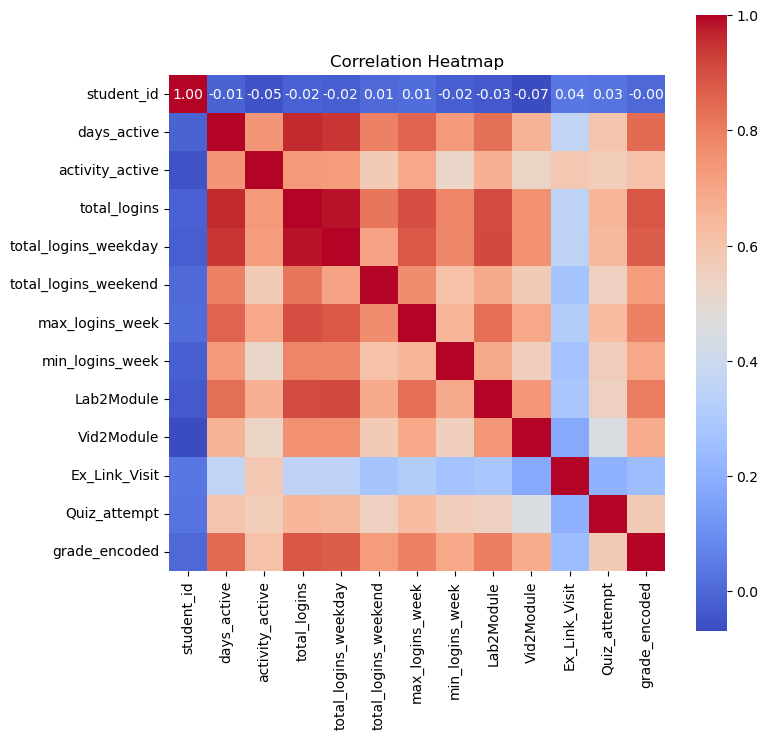

In [88]:
import seaborn as sns
plt.figure(figsize=(8, 8))  # adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

total_logins is highly correlated with days_active as well as total_logins_weekday. I think total_login_weekday and total_login_weekends does convey information about the total_logins in general. So I am dropping this feature. Additionally, Ex_link_visit seems to be having no correlation at all with grade_encoded, so I dropping it as well. 

In [89]:
studentABT.drop("total_logins", axis = 1, inplace = True)
studentABT.drop("Ex_Link_Visit", axis = 1, inplace = True)

In [90]:
corr_matrix = studentABT.corr(numeric_only = True)

In [91]:
corr_matrix

,student_id,days_active,activity_active,total_logins_weekday,total_logins_weekend,max_logins_week,min_logins_week,Lab2Module,Vid2Module,Quiz_attempt,grade_encoded
student_id,1.000000,-0.011557,-0.050088,-0.023725,0.006013,0.013544,-0.018939,-0.032176,-0.068870,0.028596,-0.000721
days_active,-0.011557,1.000000,0.741501,0.943354,0.792930,0.860428,0.730199,0.829854,0.660165,0.600516,0.845380
activity_active,-0.050088,0.741501,1.000000,0.726979,0.571493,0.691283,0.521562,0.667429,0.530591,0.564425,0.608928
total_logins_weekday,-0.023725,0.943354,0.726979,1.000000,0.707536,0.882335,0.781525,0.908715,0.757179,0.638116,0.873162
total_logins_weekend,0.006013,0.792930,0.571493,0.707536,1.000000,0.765140,0.608106,0.688123,0.578248,0.547982,0.725750
max_logins_week,0.013544,0.860428,0.691283,0.882335,0.765140,1.000000,0.649814,0.834927,0.692478,0.631338,0.794243
min_logins_week,-0.018939,0.730199,0.521562,0.781525,0.608106,0.649814,1.000000,0.689377,0.557086,0.560353,0.691936
Lab2Module,-0.032176,0.829854,0.667429,0.908715,0.688123,0.834927,0.689377,1.000000,0.739262,0.548270,0.800698
Vid2Module,-0.068870,0.660165,0.530591,0.757179,0.578248,0.692478,0.557086,0.739262,1.000000,0.449609,0.681040
Quiz_attempt,0.028596,0.600516,0.564425,0.638116,0.547982,0.631338,0.560353,0.548270,0.449609,1.000000,0.569968


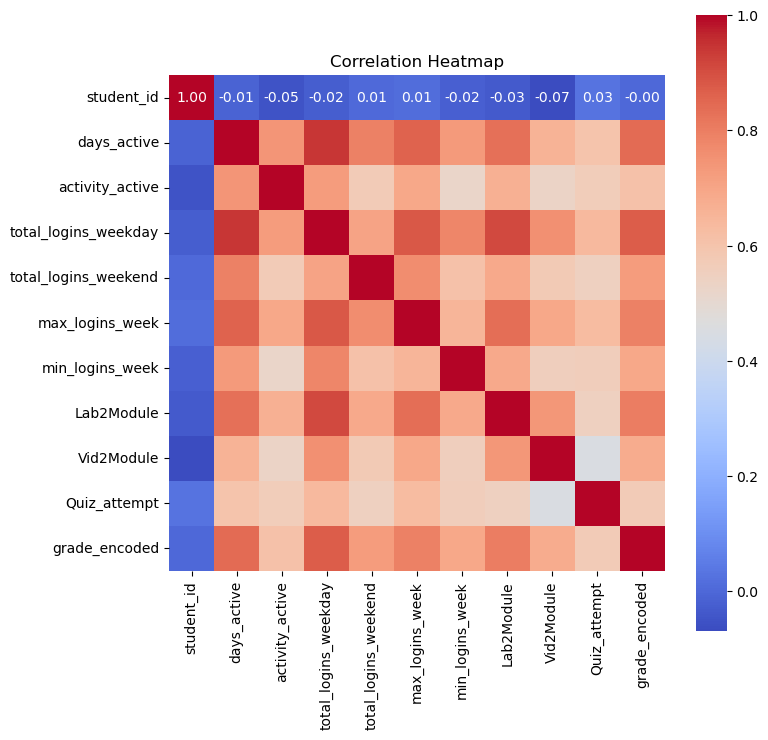

In [92]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

After getting rid of highly correlated features that would probably inflate the accuracy and removing features that were not providing much information, I have an ABT ready to be put into a classifier. However, its important to drop student_id and final_grade columns to take on Task 3.

In [93]:
studentABT.drop("student_id", axis = 1, inplace = True)
studentABT.drop("final_grade", axis = 1, inplace = True)

In [94]:
studentABT

,days_active,activity_active,total_logins_weekday,total_logins_weekend,max_logins_week,min_logins_week,Lab2Module,Vid2Module,Quiz_attempt,grade_encoded
0,47,6,133,36,19.0,4.0,0.617021,0.489362,2,3
1,22,4,62,3,11.0,3.0,0.590909,0.363636,0,0
2,27,7,59,6,15.0,0.0,0.259259,0.185185,1,1
3,47,7,112,27,24.0,4.0,0.531915,0.297872,2,2
4,33,6,61,11,13.0,1.0,0.272727,0.272727,1,1
...,...,...,...,...,...,...,...,...,...,...
295,16,4,28,0,6.0,0.0,0.187500,0.125000,0,0
296,36,6,75,5,14.0,0.0,0.361111,0.194444,3,1
297,46,7,99,34,26.0,3.0,0.586957,0.239130,2,2
298,42,7,106,23,18.0,5.0,0.500000,0.357143,2,2


#### Task 3. Classification and Evaluation

a. Using the ABT created in Task 2, apply two different classification algorithms of your choice to predict final student grades based on aggregated VLE activity. Compare the performance of the two algorithms using an appropriate evaluation strategy.

b. Experiment with applying the two classification algorithms from Task 2a in combination with different subsets of features. Which features appear to be most useful for predicting student grades?

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

After importing the required libraries for this task I am separating the class labels that is grade_encoded from the features and putting them in y. The feature data is in the df named data.

In [96]:
y = studentABT['grade_encoded']

In [97]:
X = list(studentABT.columns)
X.remove("grade_encoded")

In [98]:
data = studentABT[X]

In [99]:
data

,days_active,activity_active,total_logins_weekday,total_logins_weekend,max_logins_week,min_logins_week,Lab2Module,Vid2Module,Quiz_attempt
0,47,6,133,36,19.0,4.0,0.617021,0.489362,2
1,22,4,62,3,11.0,3.0,0.590909,0.363636,0
2,27,7,59,6,15.0,0.0,0.259259,0.185185,1
3,47,7,112,27,24.0,4.0,0.531915,0.297872,2
4,33,6,61,11,13.0,1.0,0.272727,0.272727,1
...,...,...,...,...,...,...,...,...,...
295,16,4,28,0,6.0,0.0,0.187500,0.125000,0
296,36,6,75,5,14.0,0.0,0.361111,0.194444,3
297,46,7,99,34,26.0,3.0,0.586957,0.239130,2
298,42,7,106,23,18.0,5.0,0.500000,0.357143,2


Normalising the data using StandardScaler before fitting a classifier on it.

In [100]:
normalizer = StandardScaler()
data_scaled = normalizer.fit_transform(data.values)
data_scaled

array([[ 0.66040973,  0.06800955,  1.01544173, ...,  1.17345655,
         1.74817287,  0.00364786],
       [-1.5797861 , -1.70615253, -0.90729886, ...,  1.01691874,
         0.55797016, -1.09071073],
       [-1.13174693,  0.95509058, -0.98854141, ..., -0.97126185,
        -1.1313717 , -0.54353143],
       ...,
       [ 0.5708019 ,  0.95509058,  0.09469272, ...,  0.9932238 ,
        -0.62068878,  0.00364786],
       [ 0.21237056,  0.95509058,  0.28425869, ...,  0.47193523,
         0.49649815,  0.00364786],
       [ 1.1084489 , -0.81907149,  0.55506722, ...,  0.01079533,
        -0.33573827,  0.00364786]])

Splitting the data and the class labels in y into train and test sets where the test set size is set to 30% of the train size. I am going to keep it constant throughout to ensure standardisation in tests. random_state=1 ensures reproducibity of results.

In [101]:
data_train, data_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state = 1, stratify = y)
print("Training set has %d examples" % data_train.shape[0])
print("Test set has %d examples" % data_test.shape[0])

Training set has 210 examples
Test set has 90 examples


I am using three classifiers to train my model on: KNN, SVM and RandomForest

In [102]:
knn = KNeighborsClassifier(n_neighbors=3) #have kept k = 3 at the moment but will be checking the accuracies on other k's later

In [103]:
m = knn.fit(data_train, y_train) #fitting the model on train data

In [104]:
predicted = knn.predict(data_test)
baseline_acc_kNN = accuracy_score(y_test, predicted)
print("Accuracy=%.3f" % baseline_acc_kNN)

Accuracy=0.800


In [105]:
from sklearn.metrics import confusion_matrix
# build the confusion matrix
cm = confusion_matrix(y_test, predicted)
print(cm)

[[ 7  2  0  0]
 [ 2 24  1  0]
 [ 0  3 29  4]
 [ 0  0  6 12]]


In [106]:
precision = precision_score(y_test, predicted, average='macro')
recall = recall_score(y_test, predicted, average='macro')
f1 = f1_score(y_test, predicted, average='macro')
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.83      0.89      0.86        27
           2       0.81      0.81      0.81        36
           3       0.75      0.67      0.71        18

    accuracy                           0.80        90
   macro avg       0.79      0.78      0.79        90
weighted avg       0.80      0.80      0.80        90



80% accuracy on the test set using 70% of the data in training. The model performs better in predicting Class 1 which is  grade "pass" (highest precision and recall). Class 3 ie "distinction" has the lowest recall and F1-score, suggesting that the model struggles to predict this class correctly. Checking the accuracy with different values of k and using a 5fold cross validation. I am using stratification as their are multiple class labels and I want the data to be distributed evenly.

In [109]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    acc_scores = cross_val_score(knn, data_scaled, y, cv=stratified_kfold, scoring="accuracy")
    mean_acc = acc_scores.mean()
    print("K=%02d neighbours: Accuracy=%.3f" % (k, mean_acc))

K=01 neighbours: Accuracy=0.720
K=02 neighbours: Accuracy=0.717
K=03 neighbours: Accuracy=0.737
K=04 neighbours: Accuracy=0.773
K=05 neighbours: Accuracy=0.793
K=06 neighbours: Accuracy=0.780
K=07 neighbours: Accuracy=0.777
K=08 neighbours: Accuracy=0.773
K=09 neighbours: Accuracy=0.783
K=10 neighbours: Accuracy=0.767


Using SVM and RandomForest to get the accuracy scores and a confusion matrix

In [110]:
svm_clf = SVC(kernel='linear', probability=True)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)

In [111]:
svm_clf.fit(data_train, y_train)
rf_clf.fit(data_train, y_train)

RandomForestClassifier(random_state=1)

In [112]:
svm_preds = svm_clf.predict(data_test)
rf_preds = rf_clf.predict(data_test)

In [113]:
print("SVM Report:")
print(classification_report(y_test, svm_preds))

SVM Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.90      1.00      0.95        27
           2       0.87      0.92      0.89        36
           3       0.87      0.72      0.79        18

    accuracy                           0.89        90
   macro avg       0.91      0.85      0.88        90
weighted avg       0.89      0.89      0.89        90



Accuracy: 89% with the SVM Classifier. Class 1 (Recall = 100%) is perfectly predicted by the SVM, with a high F1-score of 0.95. Class 0 has a lower recall (78%), which indicates that some instances of class 0 are missed. Similarly, Class 3 seems to be a tough nut to crack for this classifier as well (lost F1 score: 79%). However, the SVM model performs overall better in terms of balanced performance with its weighted averages being very close to 90%.

In [114]:
print("Random Forest Report:")
print(classification_report(y_test, rf_preds))

Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.90      0.96      0.93        27
           2       0.81      0.94      0.87        36
           3       0.92      0.61      0.73        18

    accuracy                           0.87        90
   macro avg       0.91      0.82      0.85        90
weighted avg       0.88      0.87      0.86        90



The Random Forest model has slightly lower accuracy (87%) compared to the SVM (89%) but its higher than KNN. However, the precision for predicting class 3 is better than SVMs precision by 5%. But due to the recall being as low as 72%, its F1 score balances out less than the SVM F1score for the same parameter by 6%.

I will be using permutation importance to get the subsets from the features that I created. And using the features whose absence/tweaking really make a difference to accuracy of the classifier. 

In [116]:
import numpy as np
#initialising another knn for this purpose
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_train, y_train)

# Setting a baseline accuracy to find the dip
y_pred = knn.predict(data_test)
baseline_accuracy = accuracy_score(y_test, y_pred)
feature_importance = {}

n_features = data_train.shape[1]  #getting the names of the features in the feature_importance dictionary
feature_importance = {}
featur_name = list(data.columns)

for i in range(n_features):
    X_test_permuted = data_test.copy()  # creating a copy of test data to corrupt it
    X_test_permuted[:, i] = np.random.permutation(X_test_permuted[:, i])  #permuting the values as random
    y_pred_permuted = knn.predict(X_test_permuted)  #checking the predictons on Test set that is permuted
    permuted_accuracy = accuracy_score(y_test, y_pred_permuted) # getting the accuracy on our permuted test set
    importance = baseline_accuracy - permuted_accuracy  # measuring the importance by substracting from  baseline accuracy
    feature_importance[featur_name[i]] = importance  # getting the importance next to accuracy


# Sort and display
importance_sorted = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance (by permutation drop in accuracy):")
for feature, importance in importance_sorted:
    print(f"{feature}: {importance:.4f}")

Feature Importance (by permutation drop in accuracy):
days_active: 0.1222
Lab2Module: 0.1111
max_logins_week: 0.1000
total_logins_weekend: 0.0556
activity_active: 0.0444
total_logins_weekday: 0.0444
Quiz_attempt: 0.0333
min_logins_week: 0.0111
Vid2Module: 0.0111


In [122]:
#using the features that have importance more than 0.02 as subset
imp_feature_subset = []
for k ,v in feature_importance.items():
  if v > 0.02:
    imp_feature_subset.append(k)

In [123]:
#extracting data that we will be using for train and test from studentABT corresponding to our imp_feature_subset
data = studentABT[imp_feature_subset]

#normalising the data using standard scaler
normalizer = StandardScaler()
data_scaled = normalizer.fit_transform(data.values)
data_scaled

array([[ 0.66040973,  0.06800955,  1.01544173, ...,  0.3976076 ,
         1.17345655,  0.00364786],
       [-1.5797861 , -1.70615253, -0.90729886, ..., -1.05705434,
         1.01691874, -1.09071073],
       [-1.13174693,  0.95509058, -0.98854141, ..., -0.32972337,
        -0.97126185, -0.54353143],
       ...,
       [ 0.5708019 ,  0.95509058,  0.09469272, ...,  1.67043679,
         0.9932238 ,  0.00364786],
       [ 0.21237056,  0.95509058,  0.28425869, ...,  0.21577485,
         0.47193523,  0.00364786],
       [ 1.1084489 , -0.81907149,  0.55506722, ...,  1.12493857,
         0.01079533,  0.00364786]])

Repeating the same process as we did above, fitting all the three classifiers on the new subset that we got from permutation importance

In [124]:
data_train, data_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state = 1, stratify = y)
print("Training set has %d examples" % data_train.shape[0])
print("Test set has %d examples" % data_test.shape[0])
knn = KNeighborsClassifier(n_neighbors=3)
m = knn.fit(data_train, y_train)

Training set has 210 examples
Test set has 90 examples


In [125]:
predicted = knn.predict(data_test)
acc = accuracy_score(y_test, predicted)
print("Accuracy=%.3f" % acc)
cm = confusion_matrix(y_test, predicted)
print(cm)

Accuracy=0.811
[[ 8  1  0  0]
 [ 0 26  1  0]
 [ 0  3 30  3]
 [ 0  2  7  9]]


In [126]:
precision = precision_score(y_test, predicted, average='macro')
recall = recall_score(y_test, predicted, average='macro')
f1 = f1_score(y_test, predicted, average='macro')
print("KNN with subset:")
print(classification_report(y_test, predicted))

KNN with subset:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.81      0.96      0.88        27
           2       0.79      0.83      0.81        36
           3       0.75      0.50      0.60        18

    accuracy                           0.81        90
   macro avg       0.84      0.80      0.81        90
weighted avg       0.81      0.81      0.80        90



1% increase in the accuracy after dropping features. The Class 3 remains a pain to predict still with lowest precision and recall values, 75% and 50% respectively. However lets check the performance with SVM and RandomForest

In [127]:
svm_clf = SVC(kernel='linear', probability=True)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)

svm_clf.fit(data_train, y_train)
rf_clf.fit(data_train, y_train)

svm_preds = svm_clf.predict(data_test)
rf_preds = rf_clf.predict(data_test)

In [128]:
print("SVM Report with subset:")
print(classification_report(y_test, svm_preds))
print("Random Forest Report with subset:")
print(classification_report(y_test, rf_preds))

SVM Report with subset:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.90      1.00      0.95        27
           2       0.89      0.92      0.90        36
           3       0.88      0.78      0.82        18

    accuracy                           0.90        90
   macro avg       0.92      0.87      0.89        90
weighted avg       0.90      0.90      0.90        90

Random Forest Report with subset:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.90      0.96      0.93        27
           2       0.78      0.86      0.82        36
           3       0.71      0.56      0.62        18

    accuracy                           0.82        90
   macro avg       0.85      0.79      0.81        90
weighted avg       0.82      0.82      0.82        90



The accuracy of SVM has increase by 1% using the subset, however with RandomForest, there is a drop of 5%. When it comes to predict the values for Class 3, the performance of randomforest has dropped significantly. SVM gives a better overall accuracy and F1 score across all labels. Given that predicting Class 3 accurately has been a problem for all the classifiers, it would be great to see if class balancing and resampling could help.

****************************************************************************************************************************************************************

****************************************************************************************************************************************************************

Some other ways to go about ABT creation. Another approach that I was trying was to create a time-series ABT and feed it to the classifiers to check how they perform. This is probably not in the scope of the assigment but I have kept it for efforts. Here apart from RandomForest (79%) accuracy, others didnt do that well. 

In [129]:
log.set_index('student_id')

,date,activity,is_weekend,Weekly
student_id,,,,
22149,2024-09-09,module_visit,False,2024-09-09/2024-09-15
22149,2024-09-09,topic_visit,False,2024-09-09/2024-09-15
22149,2024-09-09,topic_visit,False,2024-09-09/2024-09-15
22149,2024-09-09,lab_material_download,False,2024-09-09/2024-09-15
22149,2024-09-11,module_visit,False,2024-09-09/2024-09-15
...,...,...,...,...
22469,2024-10-10,forum_post_reply,False,2024-10-07/2024-10-13
22469,2024-10-16,module_visit,False,2024-10-14/2024-10-20
22469,2024-11-13,module_visit,False,2024-11-11/2024-11-17


In [130]:
week = ['2024-09-09/2024-09-15', '2024-09-16/2024-09-22', '2024-09-23/2024-09-29',
 '2024-09-30/2024-10-06', '2024-10-07/2024-10-13', '2024-10-14/2024-10-20',
 '2024-10-21/2024-10-27', '2024-10-28/2024-11-03', '2024-11-04/2024-11-10',
 '2024-11-11/2024-11-17', '2024-11-18/2024-11-24', '2024-11-25/2024-12-01']

exchange = list(range(len(week)))
print(exchange)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [131]:
Student_data =[]
for name, data in log.groupby(["student_id"]):
    l = {}
    # print(name)
    # print(data)
    l['id'] = name
    for n, d in data.groupby(["Weekly"]):
        l["Week_" + str(exchange[week.index(str(n))])] = d['activity'].value_counts().to_dict()
    Student_data.append(l)
    

/var/folders/ly/kgrwm8596cs_hs_dcb81wb440000gn/T/ipykernel_65621/1804866353.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, data in log.groupby(["student_id"]):
/var/folders/ly/kgrwm8596cs_hs_dcb81wb440000gn/T/ipykernel_65621/1804866353.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for n, d in data.groupby(["Weekly"]):
/var/folders/ly/kgrwm8596cs_hs_dcb81wb440000gn/T/ipykernel_65621/1804866353.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for n,

In [132]:
Student_data

[{'id': 22002,
  'Week_0': {'module_visit': 5,
   'topic_visit': 5,
   'video_lecture_view': 2,
   'lab_material_download': 1},
  'Week_1': {'topic_visit': 8,
   'module_visit': 4,
   'lab_material_download': 4,
   'video_lecture_view': 3},
  'Week_2': {'topic_visit': 6,
   'module_visit': 4,
   'video_lecture_view': 3,
   'lab_material_download': 3},
  'Week_3': {'module_visit': 2, 'topic_visit': 2},
  'Week_4': {'topic_visit': 6,
   'module_visit': 5,
   'video_lecture_view': 2,
   'lab_material_download': 2,
   'forum_post_reply': 1},
  'Week_5': {'topic_visit': 6,
   'module_visit': 5,
   'video_lecture_view': 2,
   'lab_material_download': 2,
   'forum_post_reply': 1},
  'Week_6': {'module_visit': 5,
   'topic_visit': 5,
   'video_lecture_view': 3,
   'lab_material_download': 3},
  'Week_7': {'topic_visit': 8,
   'module_visit': 4,
   'lab_material_download': 3,
   'video_lecture_view': 2,
   'forum_post_reply': 1},
  'Week_8': {'module_visit': 3,
   'topic_visit': 1,
   'video_le

In [133]:
activity_list = ['module_visit', 'topic_visit', 'lab_material_download',
       'forum_post_reply', 'video_lecture_view', 'quiz_attempt',
       'external_link_click']

weekly_activity_dict = {}
for i in range(12):
    for j in activity_list:
        weekly_activity_dict["Week_" + str(i) + "_" + j] = []

student_id_list = []

In [134]:
for i in Student_data:
    week_list = ["Week_" + str(i) for i in range(12)]
    for key, value in i.items():
        if key == 'id':
            student_id_list.append(value)
        else:
            week_list.remove(key)
            # print(value)
            for a in activity_list:
                if a in value.keys():
                    #print(key + "_" + a, value[a])
                    weekly_activity_dict[key + "_" + a].append(value[a])
                else:
                    #print("Not found:  ", key + "_" + a, 0)
                    weekly_activity_dict[key + "_" + a].append(0)
    if len(week_list) != 0:
        for week in week_list:
            for a in activity_list:
                    weekly_activity_dict[week + "_" + a].append(0)
        

In [135]:
for key,value in weekly_activity_dict.items():
    print(key, "===>", len(value))
print()

Week_0_module_visit ===> 300
Week_0_topic_visit ===> 300
Week_0_lab_material_download ===> 300
Week_0_forum_post_reply ===> 300
Week_0_video_lecture_view ===> 300
Week_0_quiz_attempt ===> 300
Week_0_external_link_click ===> 300
Week_1_module_visit ===> 300
Week_1_topic_visit ===> 300
Week_1_lab_material_download ===> 300
Week_1_forum_post_reply ===> 300
Week_1_video_lecture_view ===> 300
Week_1_quiz_attempt ===> 300
Week_1_external_link_click ===> 300
Week_2_module_visit ===> 300
Week_2_topic_visit ===> 300
Week_2_lab_material_download ===> 300
Week_2_forum_post_reply ===> 300
Week_2_video_lecture_view ===> 300
Week_2_quiz_attempt ===> 300
Week_2_external_link_click ===> 300
Week_3_module_visit ===> 300
Week_3_topic_visit ===> 300
Week_3_lab_material_download ===> 300
Week_3_forum_post_reply ===> 300
Week_3_video_lecture_view ===> 300
Week_3_quiz_attempt ===> 300
Week_3_external_link_click ===> 300
Week_4_module_visit ===> 300
Week_4_topic_visit ===> 300
Week_4_lab_material_download ==

In [136]:
len(student_id_list)


300

In [137]:
weekly_activity_dict["id"] = student_id_list

df = pd.DataFrame(weekly_activity_dict)

In [138]:
df.set_index("id")

,Week_0_module_visit,Week_0_topic_visit,Week_0_lab_material_download,Week_0_forum_post_reply,Week_0_video_lecture_view,Week_0_quiz_attempt,Week_0_external_link_click,Week_1_module_visit,Week_1_topic_visit,Week_1_lab_material_download,...,Week_10_video_lecture_view,Week_10_quiz_attempt,Week_10_external_link_click,Week_11_module_visit,Week_11_topic_visit,Week_11_lab_material_download,Week_11_forum_post_reply,Week_11_video_lecture_view,Week_11_quiz_attempt,Week_11_external_link_click
id,,,,,,,,,,,,,,,,,,,,,
22002,5,5,1,0,2,0,0,4,8,4,...,1,1,0,3,7,3,0,1,0,0
22003,3,0,0,0,0,0,0,1,1,1,...,1,0,0,3,4,3,0,1,0,0
22005,5,6,1,0,3,0,0,3,4,2,...,0,0,0,4,3,1,0,0,0,0
22009,4,6,3,1,2,0,0,4,4,3,...,2,0,0,4,4,1,1,1,0,0
22012,5,4,3,0,1,0,0,1,0,0,...,1,0,0,3,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22987,3,0,0,0,0,0,0,3,1,0,...,0,0,0,1,0,0,0,0,0,0
22988,5,5,2,0,1,0,1,4,2,2,...,0,0,0,4,3,2,0,1,0,0
22992,7,8,5,0,4,1,1,6,3,2,...,0,0,0,4,3,1,1,0,0,0


In [139]:
grades

,student_id,final_grade
0,22002,distinction
1,22003,fail
2,22005,pass
3,22009,merit
4,22012,pass
...,...,...
295,22987,fail
296,22988,pass
297,22992,merit
298,22994,merit


In [140]:
def pltt_now(df, index):
    dict_to_plot = {}
    activity_list = ['module_visit', 'topic_visit', 'lab_material_download',
       'forum_post_reply', 'video_lecture_view', 'quiz_attempt',
       'external_link_click']
    week_list = ["Week_" + str(i) for i in range(12)]
    for i in activity_list:
        dict_to_plot[i] = []
        for j in week_list:
            dict_to_plot[i].append(df[j + "_" + i][index])
    df_return = pd.DataFrame(dict_to_plot)
    df_return.plot(kind = "line", figsize=(10, 5), fontsize=14, title="Daily trends in activity")
    plt.grid(axis="y")
    plt.legend( fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left') #found bbox_to_anchor and loc functionality on pandas>matplotlib.legend website
    plt.xlabel('week', fontsize=14)
    plt.ylabel('count', fontsize=14);
    plt.show()
    return dict_to_plot    

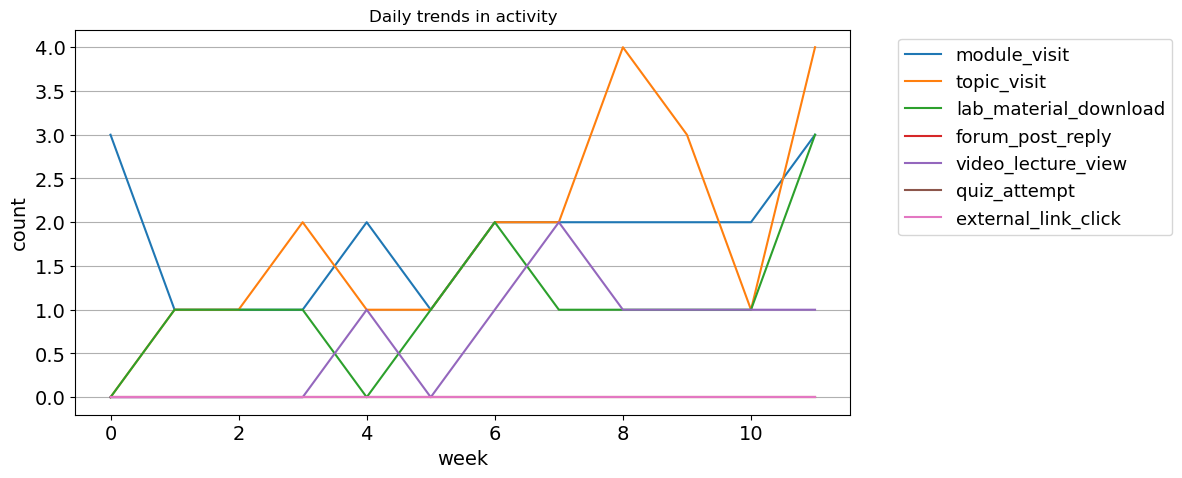

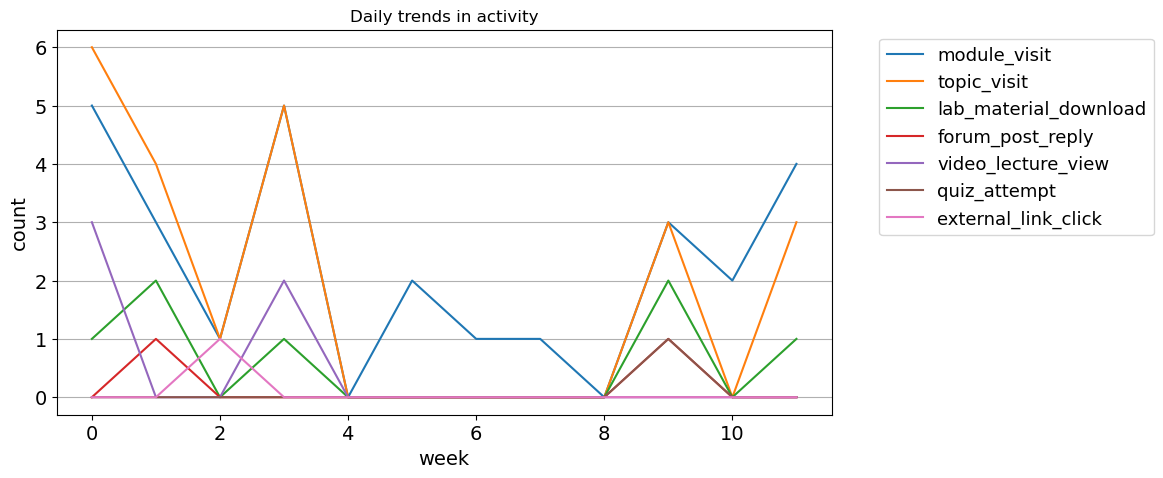

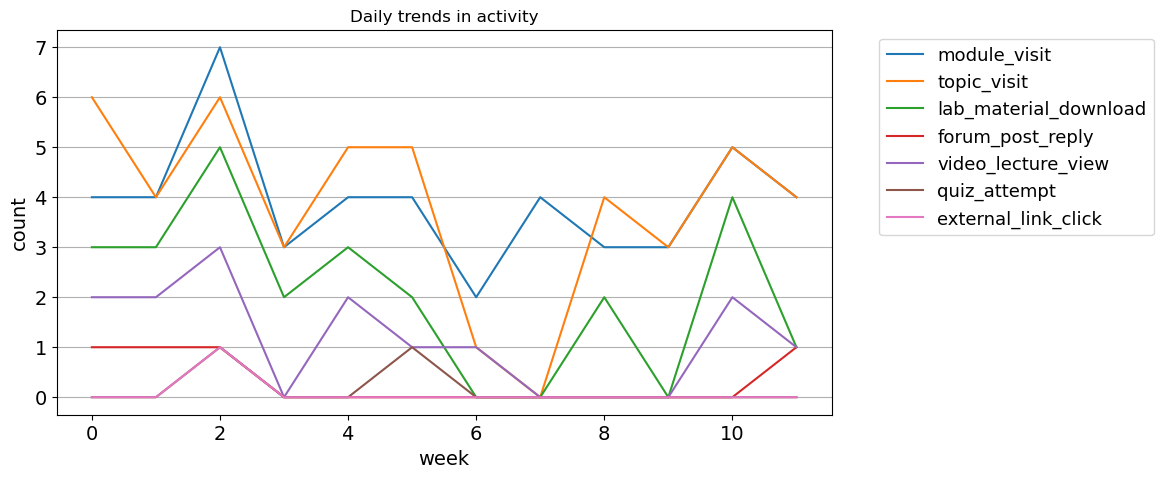

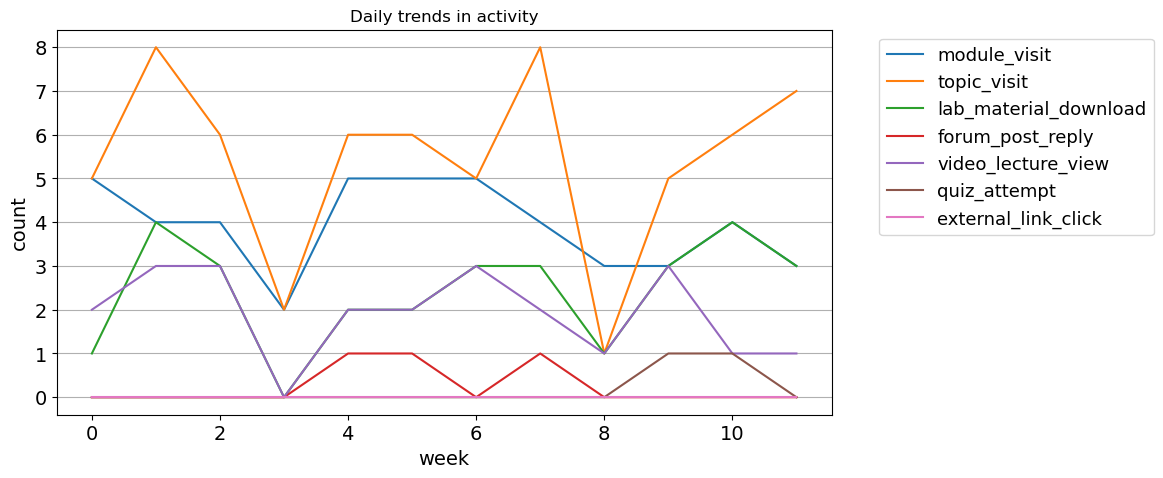

In [141]:
x = pltt_now(df, 1) # Fail
x = pltt_now(df, 2) # pass
x = pltt_now(df, 3) # merit
x = pltt_now(df, 0) # distinction


In [142]:
df.rename(columns ={ "id": "student_id" }, inplace= True)

In [143]:
df_with_grades = pd.merge(df, grades, on='student_id', how = "inner")

In [144]:
df_with_grades

,Week_0_module_visit,Week_0_topic_visit,Week_0_lab_material_download,Week_0_forum_post_reply,Week_0_video_lecture_view,Week_0_quiz_attempt,Week_0_external_link_click,Week_1_module_visit,Week_1_topic_visit,Week_1_lab_material_download,...,Week_10_external_link_click,Week_11_module_visit,Week_11_topic_visit,Week_11_lab_material_download,Week_11_forum_post_reply,Week_11_video_lecture_view,Week_11_quiz_attempt,Week_11_external_link_click,student_id,final_grade
0,5,5,1,0,2,0,0,4,8,4,...,0,3,7,3,0,1,0,0,22002,distinction
1,3,0,0,0,0,0,0,1,1,1,...,0,3,4,3,0,1,0,0,22003,fail
2,5,6,1,0,3,0,0,3,4,2,...,0,4,3,1,0,0,0,0,22005,pass
3,4,6,3,1,2,0,0,4,4,3,...,0,4,4,1,1,1,0,0,22009,merit
4,5,4,3,0,1,0,0,1,0,0,...,0,3,1,1,0,0,0,0,22012,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3,0,0,0,0,0,0,3,1,0,...,0,1,0,0,0,0,0,0,22987,fail
296,5,5,2,0,1,0,1,4,2,2,...,0,4,3,2,0,1,0,0,22988,pass
297,7,8,5,0,4,1,1,6,3,2,...,0,4,3,1,1,0,0,0,22992,merit
298,5,3,2,0,1,0,0,3,2,1,...,0,4,4,3,0,1,0,0,22994,merit


In [145]:
grade_order = {'distinction': 3, 'merit': 2, 'pass': 1, 'fail': 0}
df_with_grades['grade_encoded'] = df_with_grades['final_grade'].map(grade_order)

In [146]:
df_with_grades.drop("final_grade", axis = 1, inplace = True)

In [147]:
df_with_grades.set_index("student_id")

,Week_0_module_visit,Week_0_topic_visit,Week_0_lab_material_download,Week_0_forum_post_reply,Week_0_video_lecture_view,Week_0_quiz_attempt,Week_0_external_link_click,Week_1_module_visit,Week_1_topic_visit,Week_1_lab_material_download,...,Week_10_quiz_attempt,Week_10_external_link_click,Week_11_module_visit,Week_11_topic_visit,Week_11_lab_material_download,Week_11_forum_post_reply,Week_11_video_lecture_view,Week_11_quiz_attempt,Week_11_external_link_click,grade_encoded
student_id,,,,,,,,,,,,,,,,,,,,,
22002,5,5,1,0,2,0,0,4,8,4,...,1,0,3,7,3,0,1,0,0,3
22003,3,0,0,0,0,0,0,1,1,1,...,0,0,3,4,3,0,1,0,0,0
22005,5,6,1,0,3,0,0,3,4,2,...,0,0,4,3,1,0,0,0,0,1
22009,4,6,3,1,2,0,0,4,4,3,...,0,0,4,4,1,1,1,0,0,2
22012,5,4,3,0,1,0,0,1,0,0,...,0,0,3,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22987,3,0,0,0,0,0,0,3,1,0,...,0,0,1,0,0,0,0,0,0,0
22988,5,5,2,0,1,0,1,4,2,2,...,0,0,4,3,2,0,1,0,0,1
22992,7,8,5,0,4,1,1,6,3,2,...,0,0,4,3,1,1,0,0,0,2


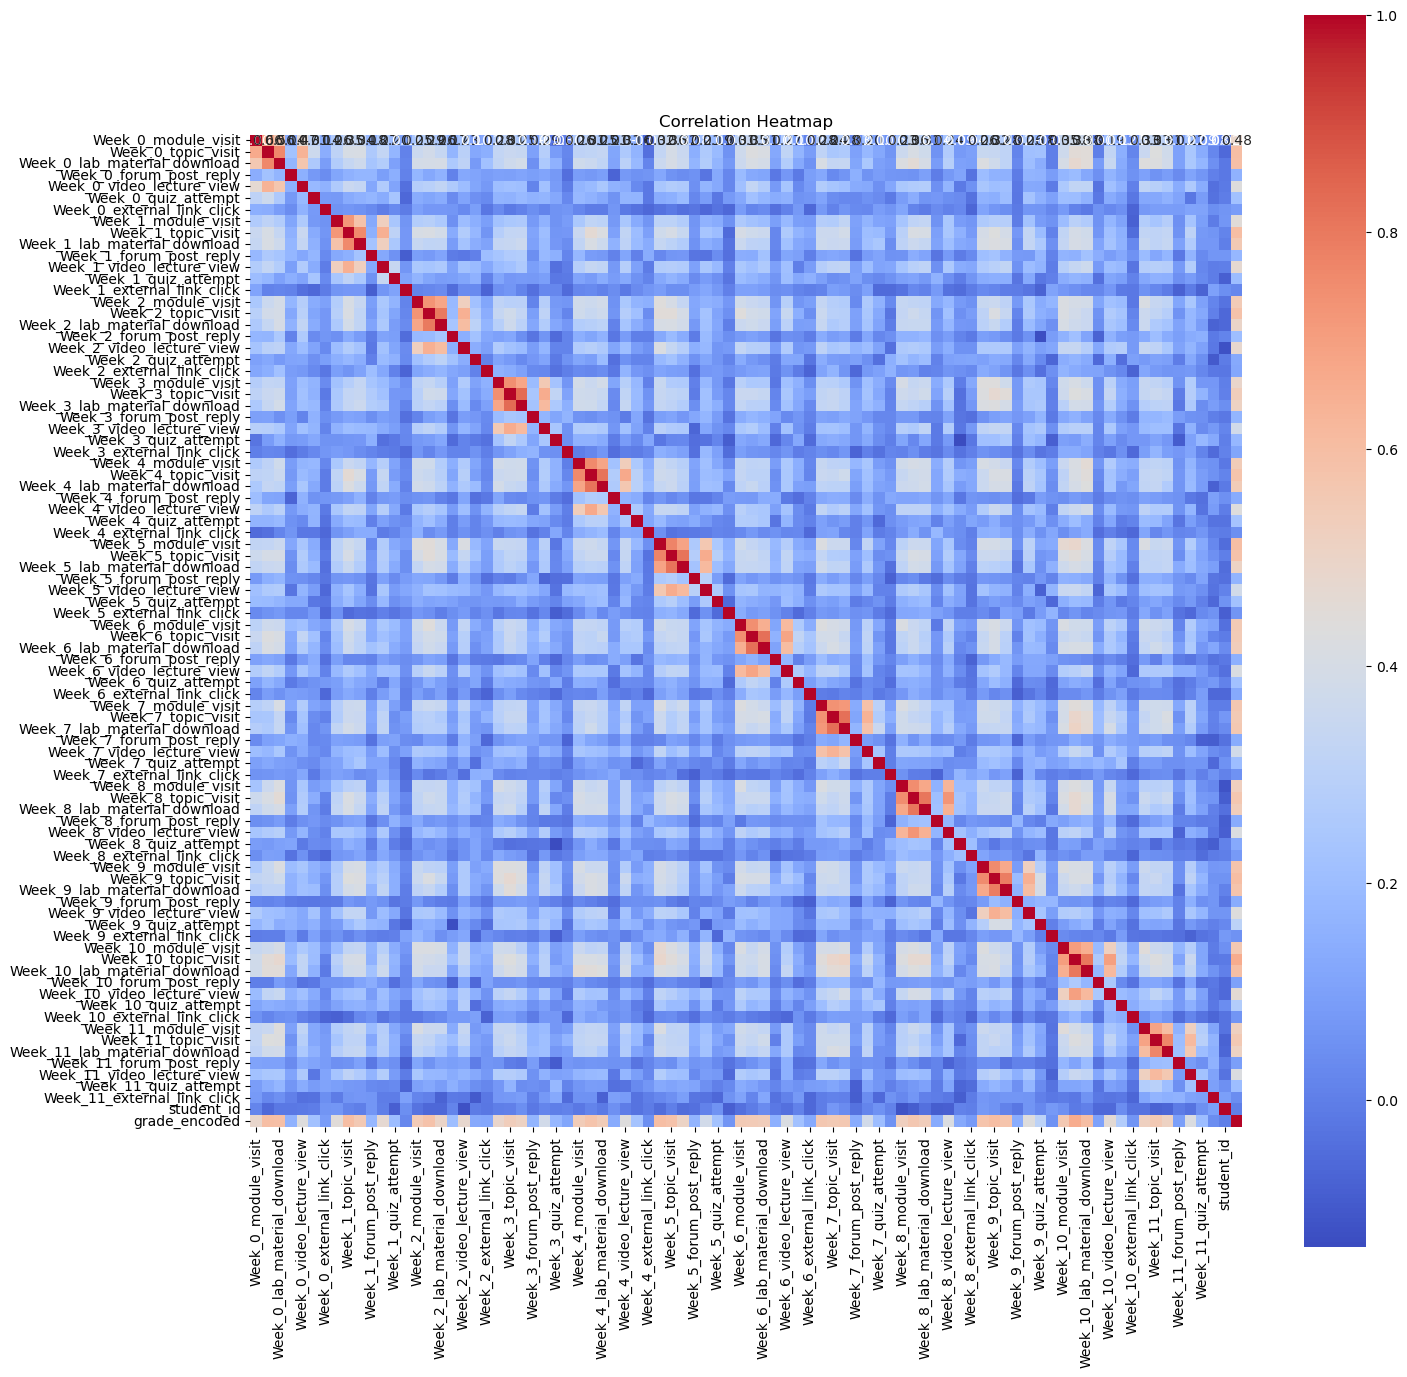

In [148]:
corr_mat = df_with_grades.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [149]:
y = df_with_grades['grade_encoded']
X = list(df_with_grades.columns)
X.remove("grade_encoded")
data = df_with_grades[X]
data

,Week_0_module_visit,Week_0_topic_visit,Week_0_lab_material_download,Week_0_forum_post_reply,Week_0_video_lecture_view,Week_0_quiz_attempt,Week_0_external_link_click,Week_1_module_visit,Week_1_topic_visit,Week_1_lab_material_download,...,Week_10_quiz_attempt,Week_10_external_link_click,Week_11_module_visit,Week_11_topic_visit,Week_11_lab_material_download,Week_11_forum_post_reply,Week_11_video_lecture_view,Week_11_quiz_attempt,Week_11_external_link_click,student_id
0,5,5,1,0,2,0,0,4,8,4,...,1,0,3,7,3,0,1,0,0,22002
1,3,0,0,0,0,0,0,1,1,1,...,0,0,3,4,3,0,1,0,0,22003
2,5,6,1,0,3,0,0,3,4,2,...,0,0,4,3,1,0,0,0,0,22005
3,4,6,3,1,2,0,0,4,4,3,...,0,0,4,4,1,1,1,0,0,22009
4,5,4,3,0,1,0,0,1,0,0,...,0,0,3,1,1,0,0,0,0,22012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3,0,0,0,0,0,0,3,1,0,...,0,0,1,0,0,0,0,0,0,22987
296,5,5,2,0,1,0,1,4,2,2,...,0,0,4,3,2,0,1,0,0,22988
297,7,8,5,0,4,1,1,6,3,2,...,0,0,4,3,1,1,0,0,0,22992
298,5,3,2,0,1,0,0,3,2,1,...,1,0,4,4,3,0,1,0,0,22994


In [150]:
corr_mat[corr_mat['grade_encoded'] > 0.5].index

Index(['Week_0_topic_visit', 'Week_0_lab_material_download',
       'Week_1_topic_visit', 'Week_1_lab_material_download',
       'Week_2_module_visit', 'Week_2_topic_visit', 'Week_3_topic_visit',
       'Week_3_lab_material_download', 'Week_4_module_visit',
       'Week_4_topic_visit', 'Week_4_lab_material_download',
       'Week_5_module_visit', 'Week_5_topic_visit',
       'Week_5_lab_material_download', 'Week_6_module_visit',
       'Week_6_topic_visit', 'Week_6_lab_material_download',
       'Week_7_module_visit', 'Week_7_topic_visit',
       'Week_7_lab_material_download', 'Week_8_module_visit',
       'Week_8_topic_visit', 'Week_8_lab_material_download',
       'Week_9_module_visit', 'Week_9_topic_visit',
       'Week_9_lab_material_download', 'Week_10_module_visit',
       'Week_10_topic_visit', 'Week_10_lab_material_download',
       'Week_11_module_visit', 'Week_11_topic_visit',
       'Week_11_lab_material_download', 'grade_encoded'],
      dtype='object')

In [151]:
normalizer = StandardScaler()
data_scaled = normalizer.fit_transform(data.values)
data_scaled
data_train, data_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state = 1, stratify = y)
print("Training set has %d examples" % data_train.shape[0])
print("Test set has %d examples" % data_test.shape[0])


Training set has 210 examples
Test set has 90 examples


In [152]:
knn = KNeighborsClassifier(n_neighbors=3)
m = knn.fit(data_train, y_train)
predicted = knn.predict(data_test)
# calculate the accuracy


In [153]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predicted)
print("Accuracy=%.3f" % acc)
from sklearn.metrics import confusion_matrix
# build the confusion matrix
cm = confusion_matrix(y_test, predicted)
print(cm)


Accuracy=0.656
[[ 8  1  0  0]
 [ 4 22  1  0]
 [ 1 14 18  3]
 [ 0  1  6 11]]


In [156]:
precision = precision_score(y_test, predicted, average='macro')
recall = recall_score(y_test, predicted, average='macro')
f1 = f1_score(y_test, predicted, average='macro')
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.58      0.81      0.68        27
           2       0.72      0.50      0.59        36
           3       0.79      0.61      0.69        18

    accuracy                           0.66        90
   macro avg       0.68      0.70      0.67        90
weighted avg       0.68      0.66      0.65        90



In [157]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    acc_scores = cross_val_score(knn, data_scaled, y, cv=5, scoring="accuracy")
    mean_acc = acc_scores.mean()
    print("K=%02d neighbours: Accuracy=%.3f" % (k, mean_acc))

K=01 neighbours: Accuracy=0.650
K=02 neighbours: Accuracy=0.577
K=03 neighbours: Accuracy=0.623
K=04 neighbours: Accuracy=0.623
K=05 neighbours: Accuracy=0.660
K=06 neighbours: Accuracy=0.643
K=07 neighbours: Accuracy=0.667
K=08 neighbours: Accuracy=0.657
K=09 neighbours: Accuracy=0.657
K=10 neighbours: Accuracy=0.653


In [158]:
svm_clf = SVC(kernel='linear', probability=True)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)
svm_clf.fit(data_train, y_train)
rf_clf.fit(data_train, y_train)


RandomForestClassifier(random_state=1)

In [159]:
svm_preds = svm_clf.predict(data_test)
rf_preds = rf_clf.predict(data_test)

In [160]:
print("SVM Report:")
print(classification_report(y_test, svm_preds))

print("Random Forest Report:")
print(classification_report(y_test, rf_preds))

SVM Report:
              precision    recall  f1-score   support

           0       0.54      0.78      0.64         9
           1       0.57      0.59      0.58        27
           2       0.61      0.47      0.53        36
           3       0.57      0.67      0.62        18

    accuracy                           0.58        90
   macro avg       0.57      0.63      0.59        90
weighted avg       0.58      0.58      0.57        90

Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.90      0.96      0.93        27
           2       0.71      0.89      0.79        36
           3       0.67      0.33      0.44        18

    accuracy                           0.79        90
   macro avg       0.82      0.74      0.76        90
weighted avg       0.79      0.79      0.77        90

